In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

### Reference orbit:

In [3]:
ref_df = pd.read_csv('Dataframes/3rdBodyPerturbationPoliastro_HIGHTOL.csv')
ref_df_v = pd.read_csv('Dataframes/3rdBodyPerturbationPoliastro_vv_HIGHTOL.csv')

ref_df['x_vv']=ref_df_v.vv_x
ref_df['y_vv']=ref_df_v.vv_y
ref_df['z_vv']=ref_df_v.vv_z

ref_df

,x,y,z,x_vv,y_vv,z_vv
0,42159.783600,0.000000,0.000000,0.000000,3.074505,0.053666
1,39159.545489,15563.916192,266.913396,-1.142984,2.852848,0.048528
2,30572.240101,28909.065576,496.928457,-2.127756,2.228986,0.039518
3,17596.058985,38144.724801,671.355898,-2.813645,1.287414,0.027234
4,2068.443209,41949.722913,775.646911,-3.098444,0.161674,0.012698
...,...,...,...,...,...,...
995,38234.560983,21122.626943,-7729.980003,-0.857195,2.210305,1.746021
996,31594.564686,31056.038869,1622.694286,-1.676526,1.578339,1.821188
997,21172.777063,37155.711937,10779.298456,-2.301089,0.745975,1.670545
998,8179.033302,38600.411058,18585.398385,-2.656710,-0.200198,1.303776


### Numerically-Integrated orbit:

In [4]:
num_df = pd.read_csv('Dataframes/3rdBodyPerturbationPoliastro.csv')
num_df_v = pd.read_csv('Dataframes/3rdBodyPerturbationPoliastro_vv.csv')

num_df['x_vv']=num_df_v.vv_x
num_df['y_vv']=num_df_v.vv_y
num_df['z_vv']=num_df_v.vv_z

num_df

,x,y,z,x_vv,y_vv,z_vv
0,42159.783600,0.000000,0.000000,0.000000,3.074505,0.053666
1,39159.545914,15563.916303,266.913399,-1.142984,2.852848,0.048528
2,30572.229294,28909.053086,496.928223,-2.127756,2.228986,0.039518
3,17596.068412,38144.740319,671.356184,-2.813645,1.287415,0.027234
4,2068.446366,41949.706443,775.646554,-3.098444,0.161675,0.012698
...,...,...,...,...,...,...
995,38132.961517,21370.880108,-7532.333000,-0.876644,2.199413,1.750026
996,31399.515894,31233.289707,1828.575655,-1.692745,1.562118,1.820311
997,20906.077447,37238.565267,10967.804062,-2.312211,0.726117,1.664753
998,7871.245318,38575.122415,18731.818721,-2.661184,-0.221639,1.293445


## RMSE:

In [11]:
print('RMSE for all Features:')
print()

for i in list(ref_df.columns):
    print(i)
    rmse = np.sqrt(np.mean(((ref_df[i] - num_df[i]) ** 2)))
    print(rmse)

RMSE for all Features:

x
99.66233963247481
y
102.35986180355955
z
60.69164597263876
x_vv
0.007127903075053247
y_vv
0.007411248642790973
z_vv
0.004360503621709089


## Visualization plots:

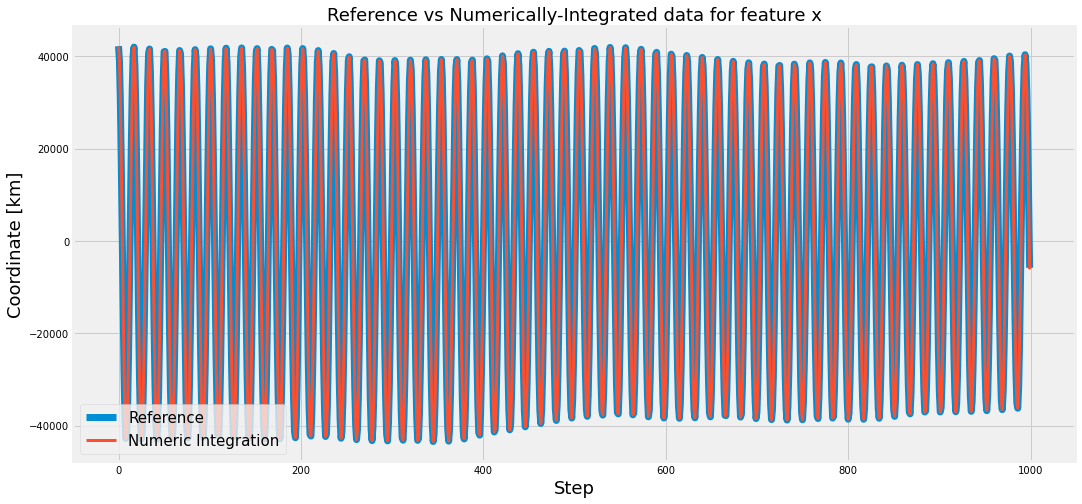

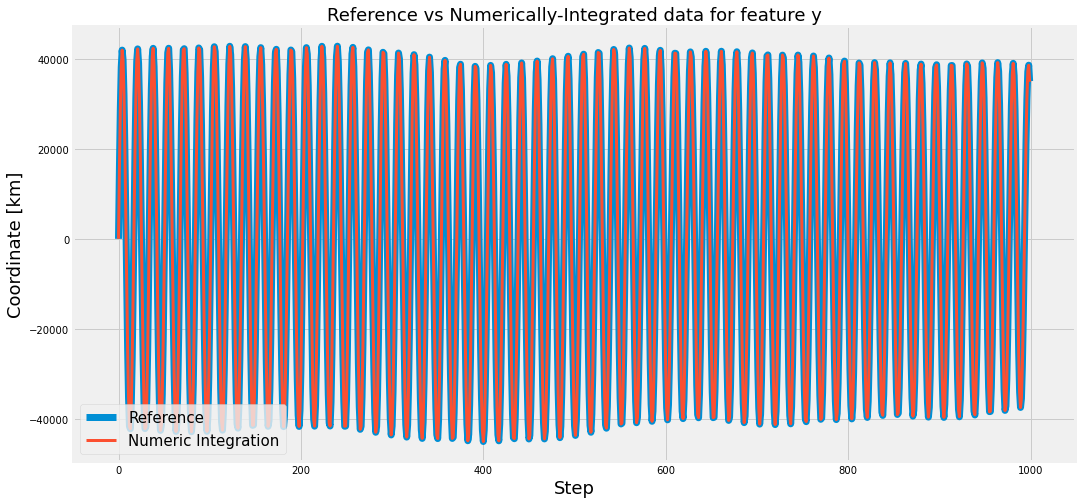

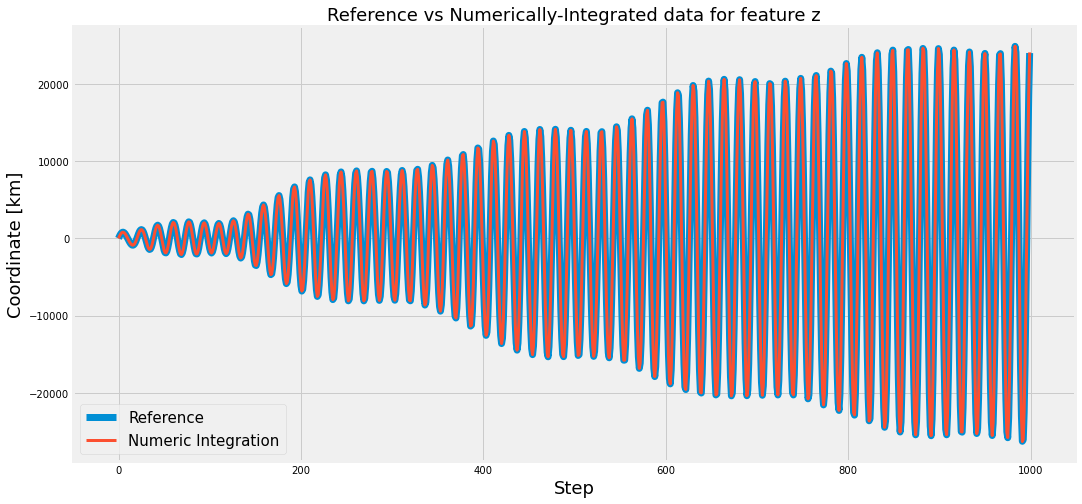

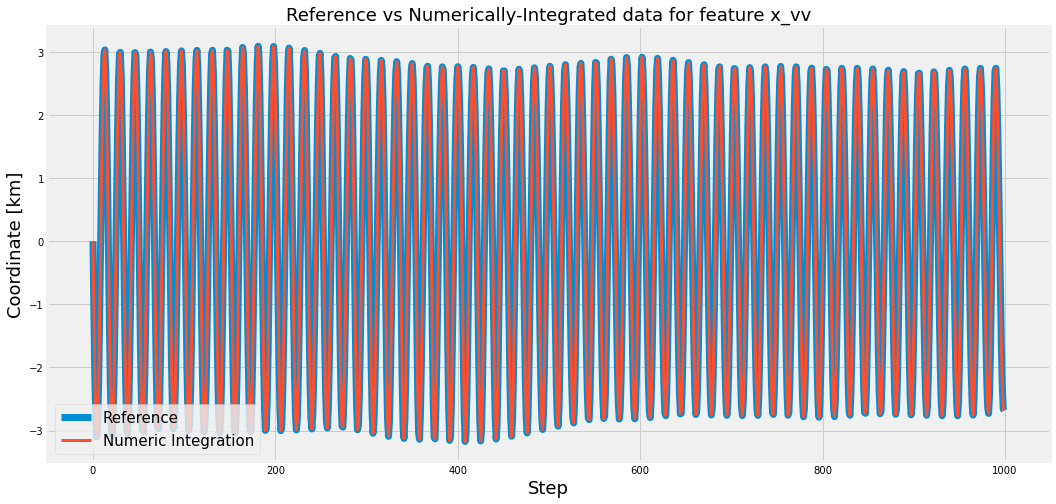

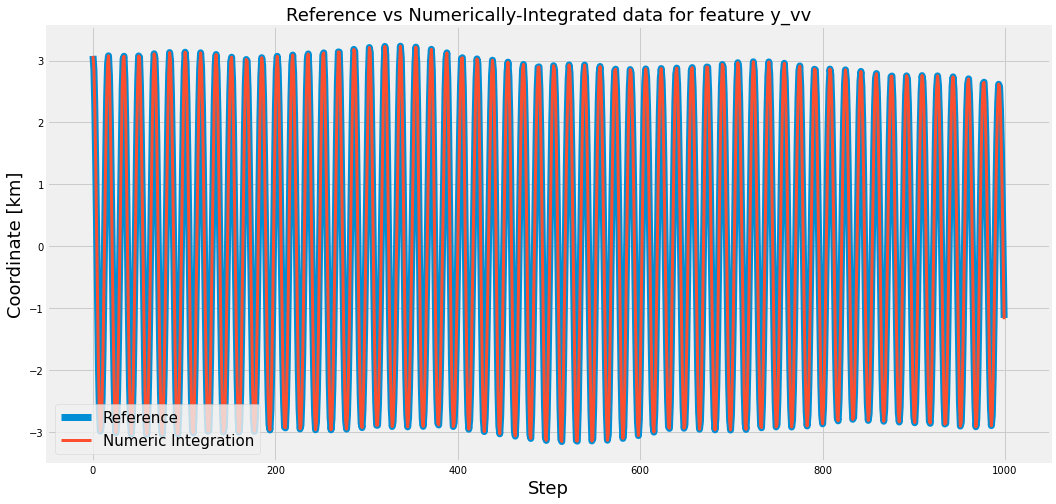

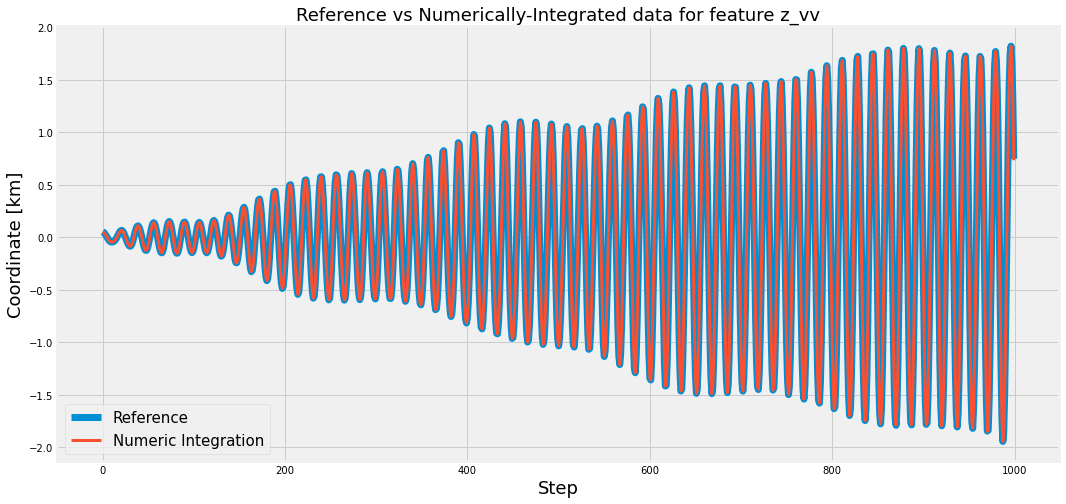

In [10]:
for feature in list(ref_df.columns):
    
    plt.figure(figsize=(16,8))

    plt.plot(ref_df[feature], linewidth=7)
    plt.plot(num_df[feature], linewidth=3)

    plt.title(f'Reference vs Numerically-Integrated data for feature {feature}', fontsize=18)
    plt.xlabel('Step', fontsize=18)
    plt.ylabel('Coordinate [km]', fontsize=18)
    plt.legend(['Reference', 'Numeric Integration'], loc='lower left', fontsize=15)
    plt.show()

In [41]:
2**2

4

## Absolute Errors:

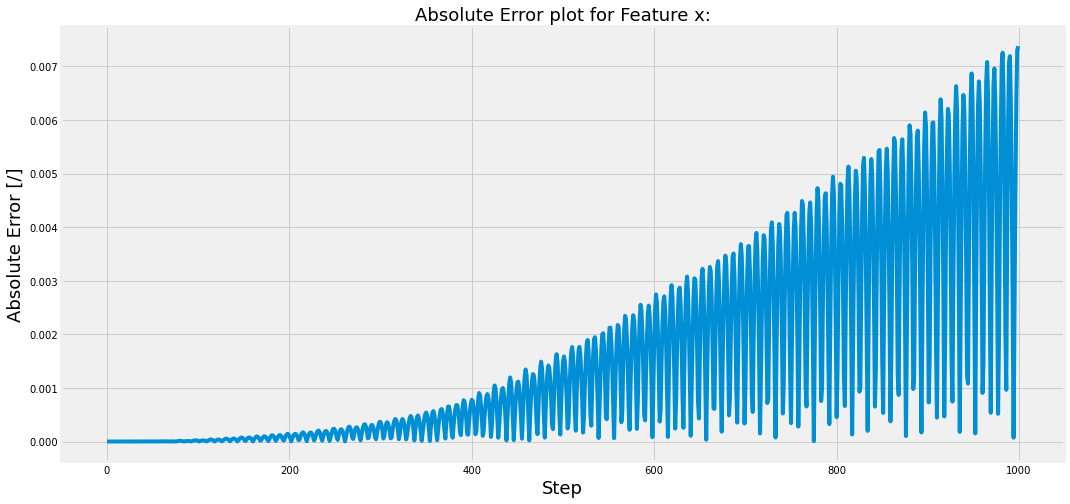

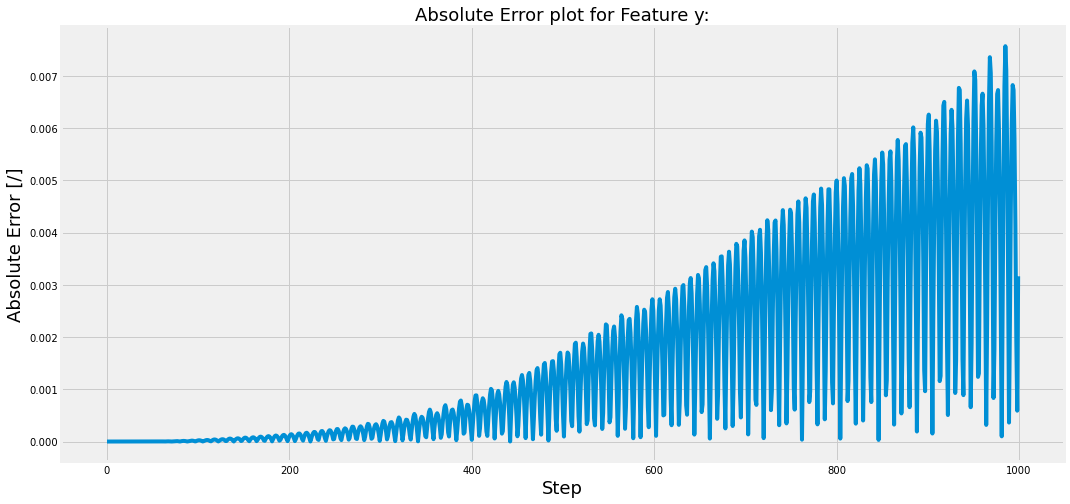

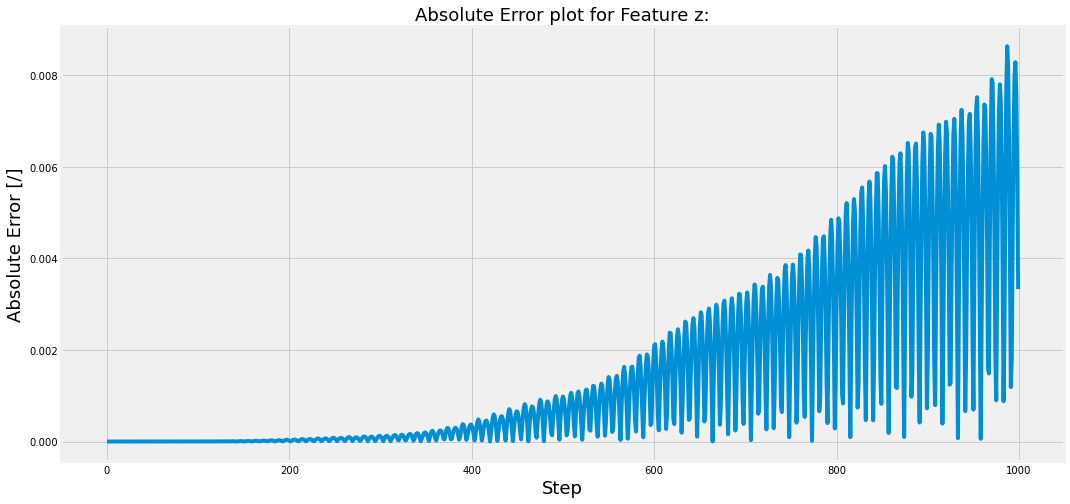

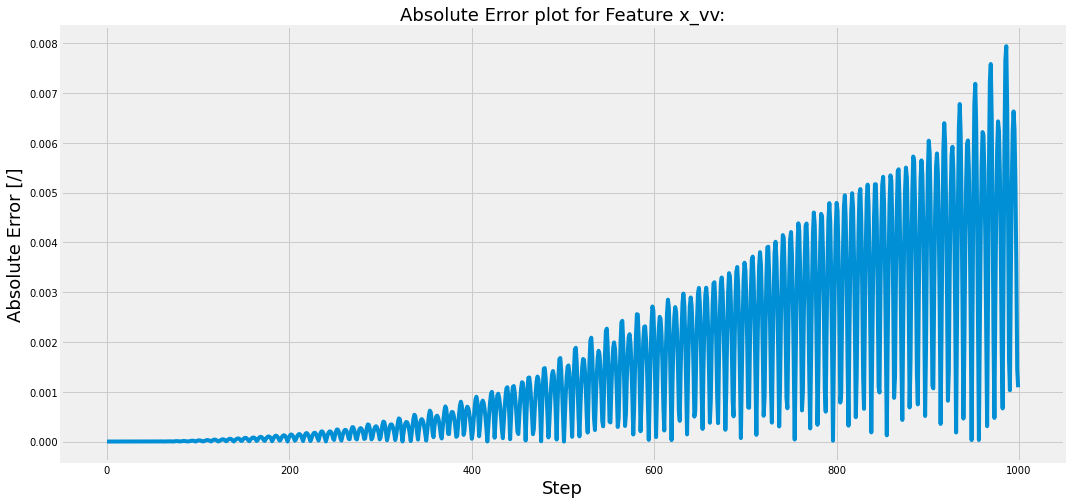

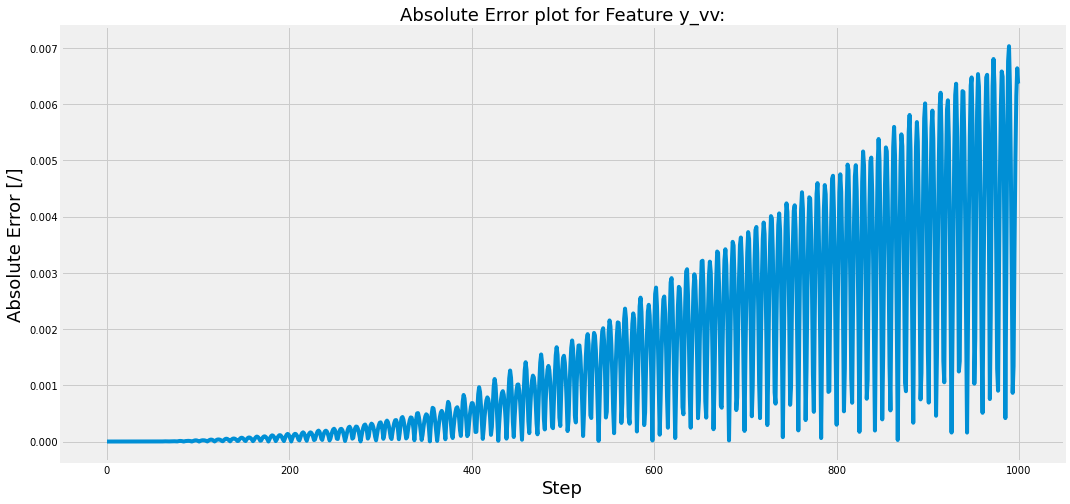

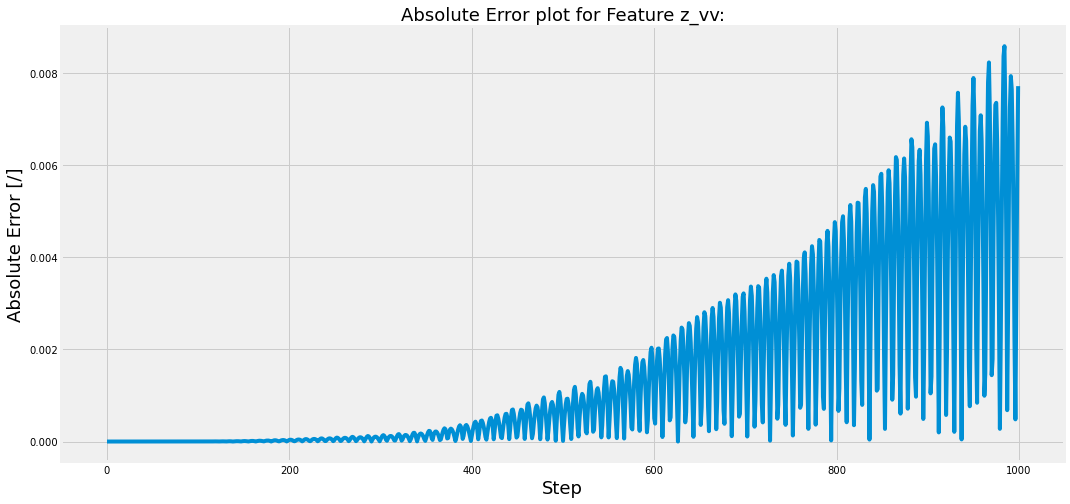

In [29]:
# ABSOLUTE ERRORS:

for feature in list(ref_df.columns):
    
    plt.figure(figsize=(16,8))

    plt.plot(abs(num_df[feature]-ref_df[feature])/max(ref_df[feature]))

    plt.title(f'Absolute Error plot for Feature {feature}:', fontsize=18)
    plt.xlabel('Step', fontsize=18)
    plt.ylabel('Absolute Error [/]', fontsize=18)
    plt.show()

In [28]:
# AVG ABSOLUTE ERRORS:

print('Mean Absolute Errors:')
print()
for i in list(ref_df.columns):
    print(i)
    abs_err=abs(num_df[i]-ref_df[i])/max(ref_df[i])
    print(abs_err.mean())

Mean Absolute Errors:

x
0.0015234512092191675
y
0.0015479588887336439
z
0.0014449753892866815
x_vv
0.0014860620791929233
y_vv
0.0014843791216158605
z_vv
0.0014151511161472554


## Relative Errors:

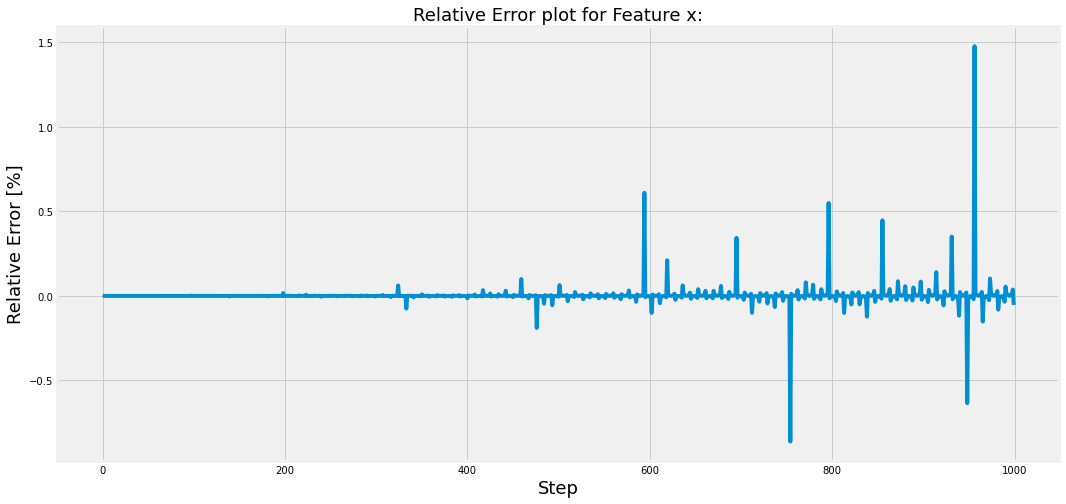

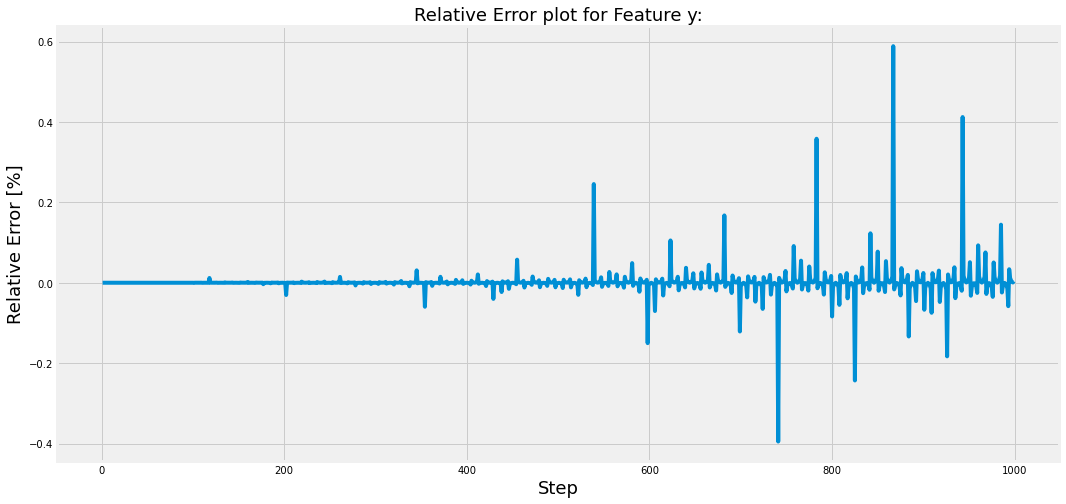

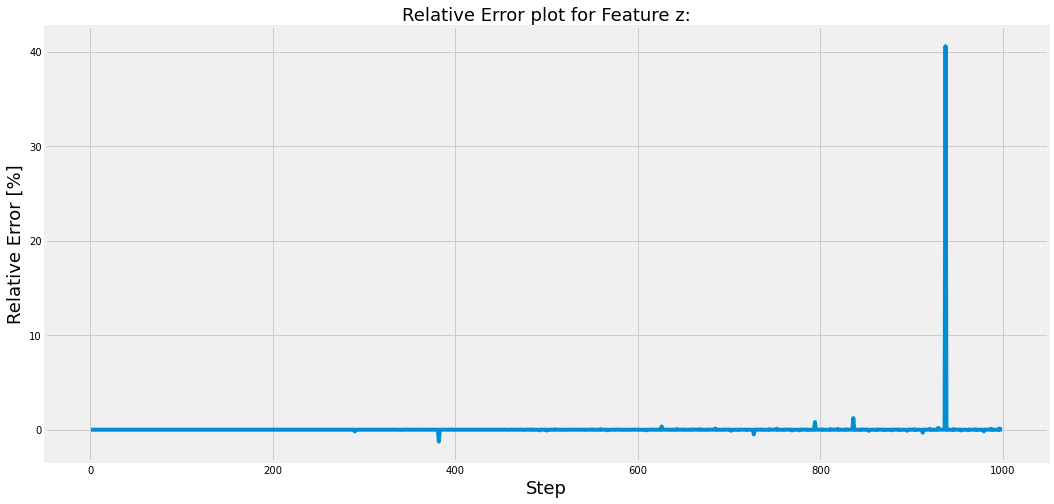

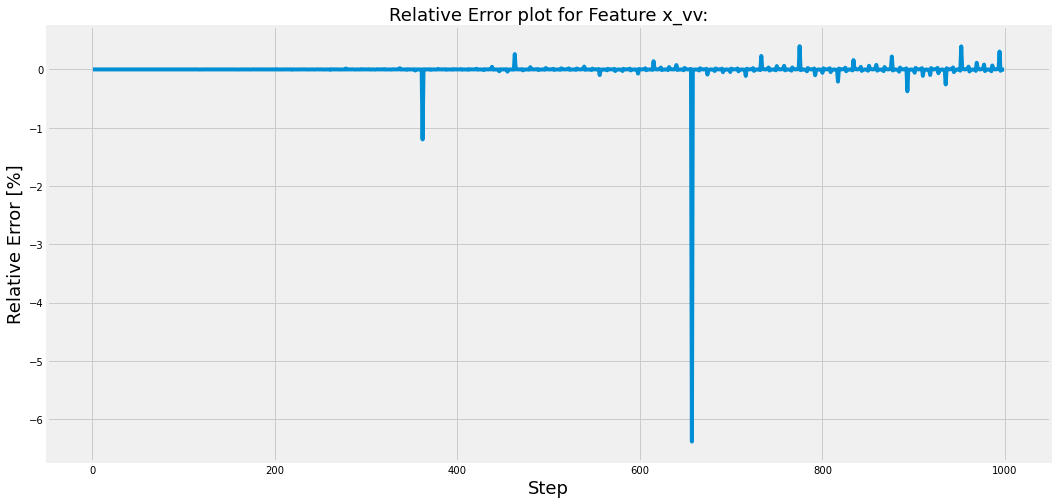

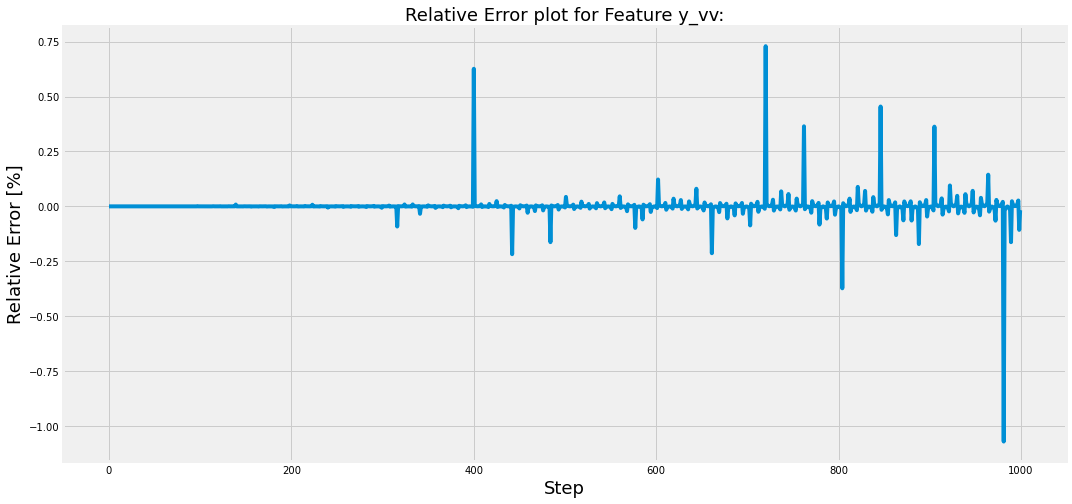

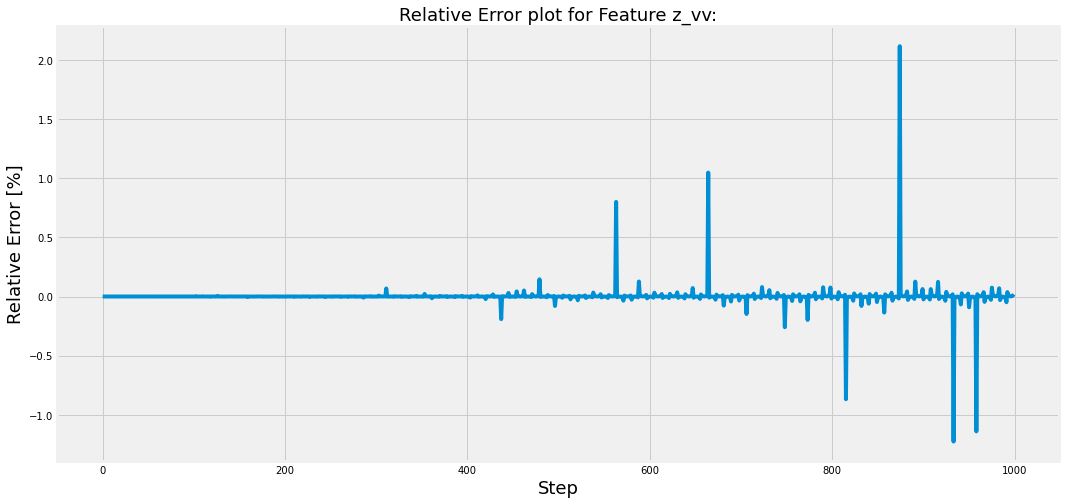

In [31]:
# RELATIVE ERRORS

for feature in list(ref_df.columns):
    
    plt.figure(figsize=(16,8))

    plt.plot(abs(num_df[feature]-ref_df[feature])/ref_df[feature])

    plt.title(f'Relative Error plot for Feature {feature}:', fontsize=18)
    plt.xlabel('Step', fontsize=18)
    plt.ylabel('Relative Error [%]', fontsize=18)
    plt.show()

In [39]:
# AVG RELATIVE ERRORS:

print('Mean Relative Errors as PERCENTAGE:')
print()
for i in list(ref_df.columns):
    print(i)
    abs_err=abs(num_df[i]-ref_df[i])/ref_df[i]*100
    print(abs_err.mean())

Mean Relative Errors as PERCENTAGE:

x
0.22632455513929542
y
0.09089252638615958
z
4.0768009322198475
x_vv
-0.6527973980919054
y_vv
0.010662702471104117
z_vv
0.05483018236167152


## Distance Error:

In [35]:
# Init empty DF for errors
df_err= pd.DataFrame(columns=['x_ref', 'y_ref', 'z_ref', 'x_num', 'y_num', 'z_num'])

df_err['x_ref']=ref_df['x']
df_err['y_ref']=ref_df['y']
df_err['z_ref']=ref_df['z']

df_err['x_num']=num_df['x']
df_err['y_num']=num_df['y']
df_err['z_num']=num_df['z']

df_err

,x_ref,y_ref,z_ref,x_num,y_num,z_num
0,42159.783600,0.000000,0.000000,42159.783600,0.000000,0.000000
1,39159.545489,15563.916192,266.913396,39159.545914,15563.916303,266.913399
2,30572.240101,28909.065576,496.928457,30572.229294,28909.053086,496.928223
3,17596.058985,38144.724801,671.355898,17596.068412,38144.740319,671.356184
4,2068.443209,41949.722913,775.646911,2068.446366,41949.706443,775.646554
...,...,...,...,...,...,...
995,38234.560983,21122.626943,-7729.980003,38132.961517,21370.880108,-7532.333000
996,31594.564686,31056.038869,1622.694286,31399.515894,31233.289707,1828.575655
997,21172.777063,37155.711937,10779.298456,20906.077447,37238.565267,10967.804062
998,8179.033302,38600.411058,18585.398385,7871.245318,38575.122415,18731.818721


In [36]:
import math

# Difference in distance in 3D (Position)

df_err['distance_error'] = ( (df_err.x_ref-df_err.x_num)**2 + (df_err.y_ref-df_err.y_num)**2 + (df_err.z_ref-df_err.z_num)**2 )**(1/2)
df_err['distance_error'].apply(lambda x: float(x))
df_err

,x_ref,y_ref,z_ref,x_num,y_num,z_num,distance_error
0,42159.783600,0.000000,0.000000,42159.783600,0.000000,0.000000,0.000000
1,39159.545489,15563.916192,266.913396,39159.545914,15563.916303,266.913399,0.000439
2,30572.240101,28909.065576,496.928457,30572.229294,28909.053086,496.928223,0.016519
3,17596.058985,38144.724801,671.355898,17596.068412,38144.740319,671.356184,0.018159
4,2068.443209,41949.722913,775.646911,2068.446366,41949.706443,775.646554,0.016773
...,...,...,...,...,...,...,...
995,38234.560983,21122.626943,-7729.980003,38132.961517,21370.880108,-7532.333000,333.191272
996,31594.564686,31056.038869,1622.694286,31399.515894,31233.289707,1828.575655,334.438379
997,21172.777063,37155.711937,10779.298456,20906.077447,37238.565267,10967.804062,336.938753
998,8179.033302,38600.411058,18585.398385,7871.245318,38575.122415,18731.818721,341.777521


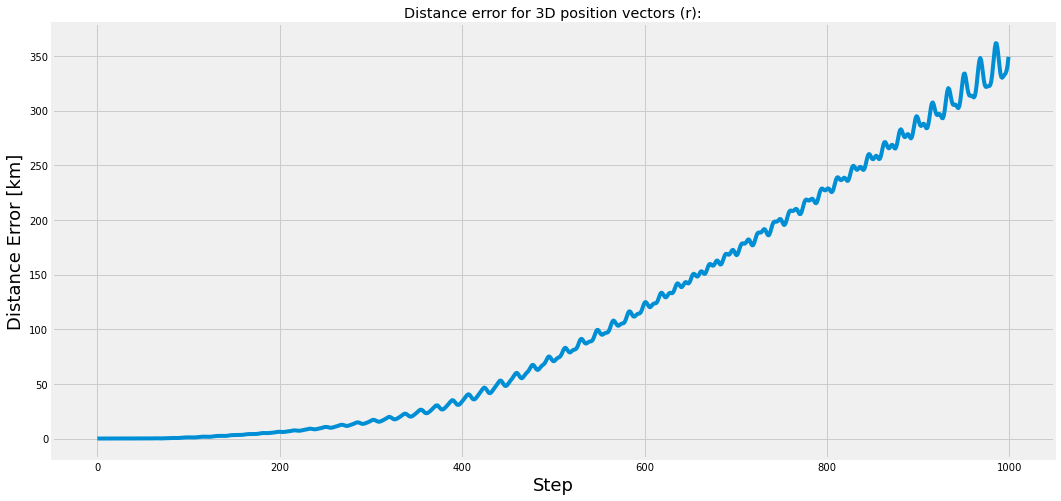

In [37]:
plt.figure(figsize=(16,8))
plt.plot(df_err.distance_error)
plt.title('Distance error for 3D position vectors (r):')
plt.xlabel('Step', fontsize=18)
plt.ylabel('Distance Error [km]', fontsize=18)
plt.show()